In [14]:
import kagglehub
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")
file_path = os.path.join(path, 'Unemployment in India.csv')
df = pd.read_csv(file_path)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# print(df.columns)
# print(df.isna().sum())
df = df.dropna()
X = df.drop([' Estimated Unemployment Rate (%)'], axis=1)
y = df[' Estimated Unemployment Rate (%)']

In [16]:
X

,Region,Date,Frequency,Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,9240903.0,40.67,Urban


In [17]:
# applying OneHotEncoder
alp_cols = ['Region', ' Date', ' Frequency', 'Area']
num_cols = [col for col in X.columns if col not in alp_cols]
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), alp_cols)
    ],
    remainder='passthrough'
)

# transform X
X_encoded = ct.fit_transform(X)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.1, random_state=42)


# model_training
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# prediction
y_pred = model.predict(X_test)

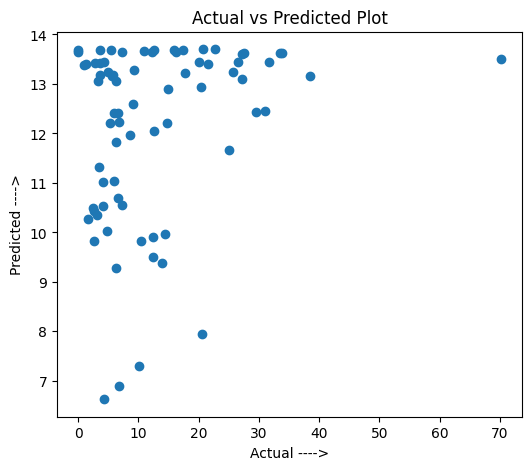

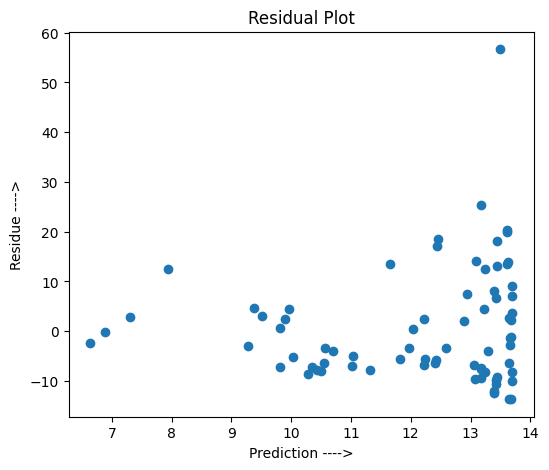

In [19]:
# visualization
# 1. 1. Actual vs Predicted data
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual ---->")
plt.ylabel("Predicted ---->")
plt.show()

# 2. Residue Plot
plt.figure(figsize=(6, 5))
residue = y_test-y_pred
plt.scatter(y_pred, residue)
plt.xlabel("Prediction ---->")
plt.ylabel("Residue ---->")
plt.title("Residual Plot")
plt.show()